## Linear Regression Practice Stretch Questions

In [1]:
# Importing libraries and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
gdp_le=pd.read_csv('../data/gdp_le.csv')

##### Question 1

1. So far, we've looked at the effect of gdp per capita alone on life expectancy. Let's see what happens if we also consider the continent variable. For this question, return to the 2021 subset.    
    a. Fit a model for life expectancy using log of gdp per capita and continent. How does this compare to the model that just used log of gdp per capita? Interpret the meaning of the coefficients you get with this new model.    
    b. Now, add an interaction term between continent and log gdp per capita. Are the interaction terms statistically significant? Interpret the meaning of the interaction terms.  

In [2]:
gdp_le_2021=gdp_le[gdp_le['Year']==2021]

In [3]:
# Model for life expectancy that just uses log of gdp per capita
lr_le_2021 = smf.ols("Life_Expectancy ~ I(np.log(GDP_Per_Capita))", data=gdp_le_2021).fit()
lr_le_2021.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     432.6
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           1.06e-48
Time:                        20:03:42   Log-Likelihood:                -490.22
No. Observations:                 173   AIC:                             984.4
Df Residuals:                     171   BIC:                             990.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    18.9470      2.547      7.438      0.000      13.919      23.975
I(np.log(GDP_Per_Capita))     5.5890      0.269     20.798      0.000       5.059       6.119
==============================================================================
Omnibus:                       16.862   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.922
Skew:                          -0.725   Prob(JB):                     7.78e-05
Kurtosis:                       3.725   Cond. No.                         77.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
# Fit a model for life expectancy using log of gdp per capita and continent
lr_le_2021_cont = smf.ols("Life_Expectancy ~ I(np.log(GDP_Per_Capita)) + Continent", data=gdp_le_2021).fit()
lr_le_2021_cont.params

Intercept                     25.883441
Continent[T.Asia]              5.183673
Continent[T.Europe]            5.104175
Continent[T.North America]     4.175711
Continent[T.Oceania]           4.765647
Continent[T.South America]     2.759830
I(np.log(GDP_Per_Capita))      4.484066
dtype: float64

In [5]:
lr_le_2021_cont.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     91.22
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           5.93e-50
Time:                        20:03:42   Log-Likelihood:                -473.20
No. Observations:                 173   AIC:                             960.4
Df Residuals:                     166   BIC:                             982.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     25.8834      2.885      8.973      0.000      20.188      31.579
Continent[T.Asia]              5.1837      0.958      5.408      0.000       3.291       7.076
Continent[T.Europe]            5.1042      1.104      4.625      0.000       2.925       7.283
Continent[T.North America]     4.1757      1.083      3.854      0.000       2.037       6.315
Continent[T.Oceania]           4.7656      1.251      3.809      0.000       2.295       7.236
Continent[T.South America]     2.7598      1.367      2.019      0.045       0.060       5.459
I(np.log(GDP_Per_Capita))      4.4841      0.343     13.056      0.000       3.806       5.162
==============================================================================
Omnibus:                        2.686   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.261   Jarque-Bera (JB):                2.693
Skew:                          -0.298   Prob(JB):                        0.260
Kurtosis:                       2.863   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*Both models have statistically significant p-values for their coefficients; in fact, all of the p-values are 0 except for the p-value associated with South America, which is 0.045. The model that incoporates continent data has a higher R-squared value than the model that does not include continent data (0.767 versus 0.717), which indicates that the continent variable helps us explain more of the variability in life expectancy than GDP alone.*

*The coefficient for log GDP per capita decreases from 5.59 to 4.48 when we add the continent variable to our model. This indicates that continent might have been a lurking variable in our initial model. Our initial model overinflated the effect of GDP per capita, since it did not control for the effect of continent.*

*As far as the coefficients per continent, we see that a country being located in Asia or Europe has the largest positive effect on its life expectancy, while being in South America has a smaller (but still positive) effect on the country's life expectancy.*

In [6]:
# Adding an interaction term between continent and log gdp per capita
lr_le_2021_cont_interact = smf.ols("Life_Expectancy ~ I(np.log(GDP_Per_Capita)) + Continent + I(np.log(GDP_Per_Capita)):Continent", data=gdp_le_2021).fit()
lr_le_2021_cont_interact.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     51.16
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           7.75e-47
Time:                        20:03:42   Log-Likelihood:                -469.29
No. Observations:                 173   AIC:                             962.6
Df Residuals:                     161   BIC:                             1000.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Intercept                                               33.6202      5.045      6.664      0.000      23.657      43.583
Continent[T.Asia]                                       -4.6179      7.592     -0.608      0.544     -19.610      10.374
Continent[T.Europe]                                    -24.9656     11.851     -2.107      0.037     -48.370      -1.561
Continent[T.North America]                              -1.2193     10.428     -0.117      0.907     -21.812      19.373
Continent[T.Oceania]                                    -2.4319     11.002     -0.221      0.825     -24.159      19.296
Continent[T.South America]                             -27.9467     32.737     -0.854      0.395     -92.596      36.703
I(np.log(GDP_Per_Capita))                                3.5449      0.609      5.824      0.000       2.343       4.747
I(np.log(GDP_Per_Capita)):Continent[T.Asia]              1.1547      0.847      1.364      0.175      -0.518       2.827
I(np.log(GDP_Per_Capita)):Continent[T.Europe]            3.0839      1.195      2.581      0.011       0.724       5.444
I(np.log(GDP_Per_Capita)):Continent[T.North America]     0.6996      1.112      0.629      0.530      -1.496       2.895
I(np.log(GDP_Per_Capita)):Continent[T.Oceania]           0.8781      1.257      0.699      0.486      -1.603       3.360
I(np.log(GDP_Per_Capita)):Continent[T.South America]     3.3185      3.403      0.975      0.331      -3.403      10.040
==============================================================================
Omnibus:                        1.067   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.587   Jarque-Bera (JB):                0.869
Skew:                          -0.172   Prob(JB):                        0.648
Kurtosis:                       3.053   Cond. No.                     1.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

*Using an alpha value of 0.05, only the coeffient for the interaction between log GDP per capita and Europe is significant. Adding the interaction terms to our model incorporates the idea that continent can change the magnitude of the effect that GDP has on life expectancy.*

##### Question 2

2. The data that we are working with is time series data, which means that it contains measurements of the same variable collected over time. This can lead to violations of the linear regression model assumptions. Namely, the errors may not be independent. Let's investigate further and see how this could be corrected by restructuring our model.  
    a. Fit a linear regression model with target being gdp per capita and predictor being year using just the data for the United States.  
    b. Inspect the residuals for this model. Look at the correlation between the residual for a given year and the residual for the next year. Is there a statistically significant correlation?  
    c. A common technique for modeling time series data is the [ARIMA model](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average). For an in-depth discussion of ARIMA models, see https://otexts.com/fpp2/arima.html. The first thing to check is whether we have a stationary series. This can be done using the [Augmented Dickey-Fuller test](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html). We want to reject the null hypothesis before we proceed, because failing to reject implies that the series is not stationary. Run the adfuller test on the gdp per capita values for the US.  
    d. If a series is not stationary, it can be replaced by the series of differences from one time period to the next. See if the series of differences in stationary. Plot the series of differences and run the adfuller test.  
    e. Since the series of differences is stationary, we know that we need an integration term of 1. You also want to check the autocorrelation function, which can be done using the [plot_acf function](https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html#statsmodels.graphics.tsaplots.plot_acf). Are there any significant autocorrelations?     
    f. Since there were not significant autocorrelations, an ARIMA(0,1,0) model may be appropriate. Try fitting an ARIMA(0,1,0) model using https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima.model.ARIMA.html#statsmodels.tsa.arima.model.ARIMA. Try one with no trend and one with a linear trend (using the trend parameter). Compare these models on the basis of the [AIC](https://en.wikipedia.org/wiki/Akaike_information_criterion). Which does better?  
    g. Compare the estimate and confidence interval for the trend from the ordinary least squares regression model and the ARIMA model. Which has a greater standard error?

In [14]:
# Filtering data to just the US
gdp_le_us=gdp_le[gdp_le['Country']=='United States'].sort_values(by='Year')

In [20]:
# Fiting a linear regression model with target being gdp per capita and predictor being year using just the data for the United States
lr_gdp_year_us = smf.ols("GDP_Per_Capita ~ Year", data=gdp_le_us).fit()
lr_gdp_year_us.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         GDP_Per_Capita   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     743.0
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           3.17e-23
Time:                        20:12:09   Log-Likelihood:                -286.45
No. Observations:                  33   AIC:                             576.9
Df Residuals:                      31   BIC:                             579.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.416e+06   5.39e+04    -26.284      0.000   -1.53e+06   -1.31e+06
Year         732.2508     26.863     27.258      0.000     677.462     787.039
==============================================================================
Omnibus:                        2.995   Durbin-Watson:                   0.488
Prob(Omnibus):                  0.224   Jarque-Bera (JB):                2.165
Skew:                           0.457   Prob(JB):                        0.339
Kurtosis:                       2.140   Cond. No.                     4.23e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Residual (PPP)')

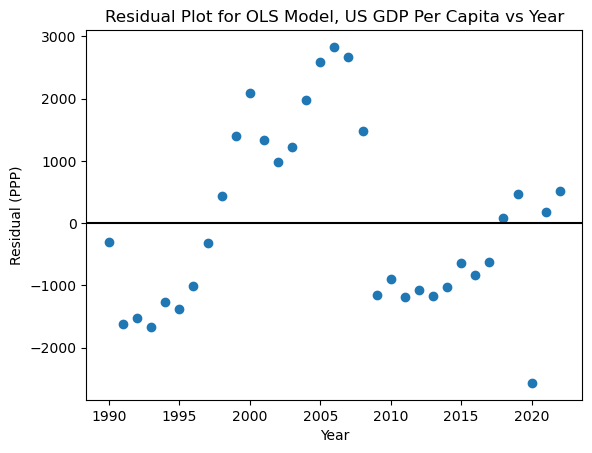

In [21]:
plt.scatter(gdp_le_us['Year'], lr_gdp_year_us.resid)
xmin, xmax = plt.xlim()
plt.hlines(y = 0, xmin = xmin, xmax = xmax, color = 'black')
plt.xlim(xmin, xmax);
plt.title('Residual Plot for OLS Model, US GDP Per Capita vs Year')
plt.xlabel('Year')
plt.ylabel('Residual (PPP)')

In [24]:
# Calculating correlation coefficient for residual vs year
gdp_le_us['GDP_Estimate'] = lr_gdp_year_us.predict(gdp_le_us[['Year']])
gdp_le_us['Residual'] = lr_gdp_year_us.resid
gdp_le_us[['Residual','Year']].corr()

,Residual,Year
Residual,1.000000e+00,1.400766e-13
Year,1.400766e-13,1.000000e+00


In [26]:
lr_gdp_year_us_resid = smf.ols("Residual ~ Year", data=gdp_le_us).fit()
lr_gdp_year_us_resid.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Residual   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                     0.000
Date:                Tue, 28 Oct 2025   Prob (F-statistic):               1.00
Time:                        20:14:52   Log-Likelihood:                -286.45
No. Observations:                  33   AIC:                             576.9
Df Residuals:                      31   BIC:                             579.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.425e-08   5.39e+04  -8.21e-13      1.000    -1.1e+05     1.1e+05
Year        2.152e-11     26.863   8.01e-13      1.000     -54.788      54.788
==============================================================================
Omnibus:                        2.995   Durbin-Watson:                   0.488
Prob(Omnibus):                  0.224   Jarque-Bera (JB):                2.165
Skew:                           0.457   Prob(JB):                        0.339
Kurtosis:                       2.140   Cond. No.                     4.23e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

*For our OLS model for US GDP Per Capita vs year, the correlation coefficient for the relationship between residuals and year is extremely close to zero, so we conclude that year does not have an appreciable effect on the size of the residual. The OLS model for residual vs year confirms this, with a p-value of 1.0 for the year coefficient.*